In [1]:
# Importing necessary packages
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('Houseprice_data_scaled.csv')

In [3]:
# First 1800 data items are training set; the next 600 are the validation set; the rest are the test set
train = data.iloc[:1800]
val = data.iloc[1800:2400]
test=data.iloc[2400:2908]

In [4]:
# Creating the "X" and "y" variables. We drop sale price from "X"
X_train, X_val,X_test = train.drop('Sale Price', axis=1), val.drop('Sale Price', axis=1), test.drop('Sale Price', axis=1)
y_train, y_val,y_test = train[['Sale Price']], val[['Sale Price']], test[['Sale Price']]

In [5]:
print("\nSummary statistics\n", data.describe())
print("\nCorrelation matrix\n", data.corr())


Summary statistics
            LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  2908.000000  2908.000000  2908.000000  2908.000000   2908.000000   
mean     -0.014297    -0.011672    -0.001960    -0.020343     -0.032348   
std       0.864624     1.012869     1.000959     1.011374      1.011740   
min      -0.992707    -3.698901    -4.115272    -3.337719     -1.691761   
25%      -0.308670    -0.797802    -0.512407    -0.598187     -0.965106   
50%      -0.089254    -0.072527    -0.512407     0.036583      0.391317   
75%       0.141143     0.652747     0.388309     0.972033      0.924198   
max      22.739771     2.828571     3.090457     1.272713      1.214860   

       TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea     FullBath  ...  \
count  2908.000000  2908.000000  2908.000000  2908.000000  2908.000000  ...   
mean     -0.024176    -0.009944    -0.007302    -0.016210    -0.003594  ...   
std       1.006134     1.003188     0.994998     0.991275     1.00

In [6]:
# Importing models
from sklearn.linear_model import LinearRegression

In [7]:
#  MSE at the train set
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_train)
print(mse(y_train,pred))

0.1496948757851087


In [8]:
# MSE at the validation dataset
lr.fit(X_train,y_train)
pred=lr.predict(X_val)
print(mse(y_val,pred))

0.15444734560114498


In [41]:
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(mse(y_test,pred))

0.150067674210941


In [9]:
# Create dataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lr.intercept_) + list(lr.coef_[0])
    ]
).transpose().set_index(0)

lreg_coefficient = pd.DataFrame()
lreg_coefficient["Features"] = X_train.columns
lreg_coefficient['Coef Estimate'] = pd.Series(lr.coef_[0])
print(lreg_coefficient)

         Features  Coef Estimate
0         LotArea       0.082885
1     OverallQual       0.260314
2     OverallCond       0.091462
3       YearBuilt       0.175222
4    YearRemodAdd       0.031755
5     TotalBsmtSF       0.176167
6        1stFlrSF       0.222085
7        2ndFlrSF       0.219521
8       GrLivArea       0.146441
9        FullBath      -0.060833
10       HalfBath      -0.012383
11   BedroomAbvGr      -0.130553
12   TotRmsAbvGrd       0.071984
13     Fireplaces       0.035594
14     GarageCars       0.084773
15     WoodDeckSF       0.029884
16    OpenPorchSF       0.030774
17  EnclosedPorch       0.006171
18      Bsmt Qual       0.027164
19  SaleCondition       0.023912


In [10]:
print('R squared training set', round(lr.score(X_train, y_train)*100, 2))
print('R squared test set', round(lr.score(X_test, y_test)*100, 2))

R squared training set 85.02
R squared test set 84.57


In [12]:
# Importing Ridge
from sklearn.linear_model import Ridge

# The alpha used by Python's ridge should be the lambda times the number of observations
alphas=[0.001*1800,0.01*1800, 0.02*1800, 0.03*1800, 0.04*1800, 0.05*1800, 0.075*1800,0.1*1800,0.2*1800, 0.4*1800]
#alphas = np.linspace(0, 3.0, num=20)*1800 # from 0 to 3 with 20 numbers inside
#alphas = range(0,2*1800)
mses=[]
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    pred=ridge.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val,pred))

0.15450566401262777
0.15489184109495496
0.15531986407793194
0.1558004835800792
0.15632685754527129
0.15688882881574234
0.15839781519840404
0.15999129988536004
0.1665432027652619
0.17915244715794368


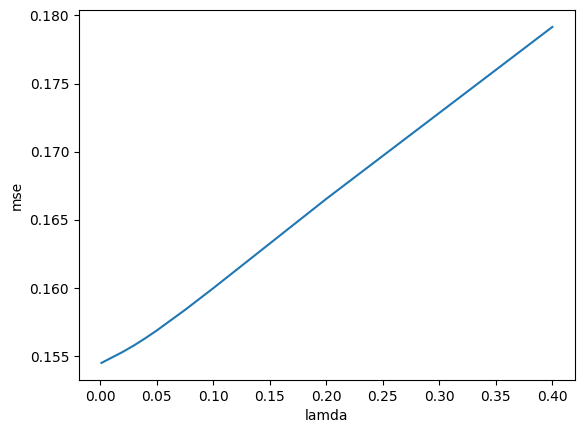

In [21]:
plt.xlabel('lamda')
plt.ylabel('mse')
lamdas = [i/1800 for i in alphas]
plt.plot(lamdas, mses)

In [14]:
from sklearn.linear_model import RidgeCV
regr_cv= RidgeCV(alphas=alphas, fit_intercept=True, cv=10)
model_cv2=regr_cv.fit(X_train,y_train)
model_cv2.alpha_

90.0

In [16]:
# MSE at the training dataset
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_train)
print(mse(y_train,pred))

0.1507687525458446


In [17]:
# MSE at the validation dataset
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train,y_train)
pred=ridge.predict(X_val)
print(mse(y_val,pred))

0.15688882881574234


In [19]:
# Ridge
# import model
from sklearn.linear_model import Ridge
# Here we produce results for alpha=135 which corresponds to lambda=135/1800=0.075
ridge=Ridge(alpha=model_cv2.alpha_)
ridge.fit(X_train, y_train)

# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(ridge.intercept_) + list(ridge.coef_[0])
    ]
).transpose().set_index(0)
ridgereg_coefficient = pd.DataFrame()
ridgereg_coefficient["Features"] = X_train.columns
ridgereg_coefficient['Coef Estimate'] = pd.Series(ridge.coef_[0])
ridgereg_coefficient

,Features,Coef Estimate
0,LotArea,0.079732
1,OverallQual,0.248931
2,OverallCond,0.080251
3,YearBuilt,0.143338
4,YearRemodAdd,0.043423
5,TotalBsmtSF,0.162117
6,1stFlrSF,0.156489
7,2ndFlrSF,0.118982
8,GrLivArea,0.204455
9,FullBath,-0.035686


In [20]:
print('R squared training set', round(ridge.score(X_train, y_train)*100, 2))
print('R squared test set', round(ridge.score(X_test, y_test)*100, 2))

R squared training set 84.91
R squared test set 84.47


In [22]:
# Import Lasso
from sklearn.linear_model import Lasso
# Here we produce results for alpha=0.05 which corresponds to lambda=0.1
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
Lasso(alpha=0.05)
# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(lasso.intercept_) + list(lasso.coef_)
    ]
).transpose().set_index(0)


lassoreg_coefficient = pd.DataFrame()
lassoreg_coefficient["Features"] = X_train.columns
lassoreg_coefficient['Coef Estimate'] = pd.Series(lasso.coef_)
lassoreg_coefficient

,Features,Coef Estimate
0,LotArea,0.046485
1,OverallQual,0.314018
2,OverallCond,0.000000
3,YearBuilt,0.061423
4,YearRemodAdd,0.058757
5,TotalBsmtSF,0.154825
6,1stFlrSF,0.059406
7,2ndFlrSF,0.000000
8,GrLivArea,0.279186
9,FullBath,0.000000


In [26]:
from sklearn.linear_model import LassoCV
regr_cv= LassoCV(alphas = None, cv = 10, max_iter = 100000)
model_cv2=regr_cv.fit(X_train,y_train)
model_cv2.alpha_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.005257212340819712

In [27]:
# MSE at the training dataset
lasso=Lasso(alpha=model_cv2.alpha_)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_train)
print(mse(y_train,pred))

0.1508915700782594


In [28]:
# MSE at the validation dataset
lasso=Lasso(alpha=model_cv2.alpha_)
lasso.fit(X_train,y_train)
pred=lasso.predict(X_val)
print(mse(y_val,pred))

0.1558443777074287


In [37]:
print('R squared training set', round(lasso.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))

R squared training set 84.9
R squared test set 84.6


In [29]:
# Elastic Net
# import model
from sklearn.linear_model import ElasticNet

# Here we produce results for alpha=0.05 which corresponds to lambda=0.1
e_net = ElasticNet(alpha=0.05)
e_net.fit(X_train, y_train)

# DataFrame with corresponding feature and its respective coefficients
coeffs = pd.DataFrame(
    [
        ['intercept'] + list(X_train.columns),
        list(e_net.intercept_) + list(e_net.coef_)
    ]
).transpose().set_index(0)


enetreg_coefficient = pd.DataFrame()
enetreg_coefficient["Features"] = X_train.columns
enetreg_coefficient['Coef Estimate'] = pd.Series(e_net.coef_)
enetreg_coefficient

,Features,Coef Estimate
0,LotArea,0.063037
1,OverallQual,0.280857
2,OverallCond,0.038926
3,YearBuilt,0.097929
4,YearRemodAdd,0.049479
5,TotalBsmtSF,0.148637
6,1stFlrSF,0.069357
7,2ndFlrSF,0.000000
8,GrLivArea,0.310337
9,FullBath,-0.000000


In [31]:
ypred = e_net.predict(X_test)
score = e_net.score(X_test, y_test)
scoreΣ

0.840296528434941

In [32]:
#ENET with different levels of alpha and its mse
# We now consider different lambda values. The alphas are half the lambdas
alphas=[0.01/2, 0.02/2, 0.03/2, 0.04/2, 0.05/2, 0.075/2, 0.1/2]
mses=[]
for alpha in alphas:
    e_net =ElasticNet(alpha=alpha)
    e_net.fit(X_train,y_train)
    pred=e_net.predict(X_val)
    mses.append(mse(y_val,pred))
    print(mse(y_val, pred))

0.1551782534695214
0.15583247394661393
0.15675057232284687
0.15782691108609945
0.15915362545736816
0.1612311838733405
0.16399555386936288


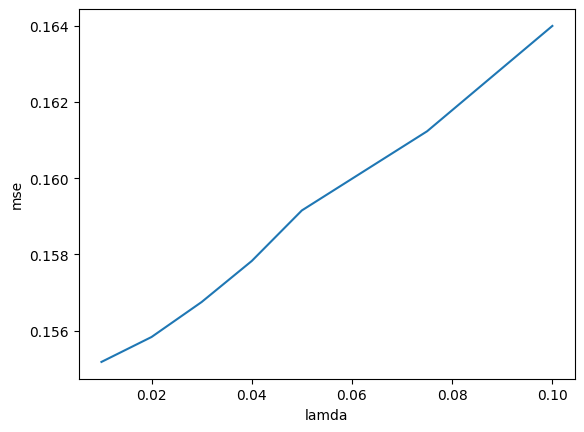

In [33]:
plt.xlabel('lamda')
plt.ylabel('mse')
lamdas = [i *2 for i in alphas]
plt.plot(lamdas, mses)

In [34]:
##We can also select the alpha using the cross-validated ridge regression function, ElasticNetCV().
##Fit Enet regression through cross validation

from sklearn.linear_model import ElasticNetCV
regr_cv= ElasticNetCV(alphas = None, cv = 10, max_iter = 100000)
#regr_cv=LassoCV(alphas=range(1,50))
model_cv2=regr_cv.fit(X_train,y_train)
model_cv2.alpha_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.00795377668199548

In [36]:
# MSE at the training dataset
e_net=ElasticNet(alpha=model_cv2.alpha_)
e_net.fit(X_train,y_train)
pred=e_net.predict(X_train)
print(mse(y_train,pred))

0.1504616162530777


In [35]:
# MSE at the validation dataset
e_net=ElasticNet(alpha=model_cv2.alpha_)
e_net.fit(X_train,y_train)
pred=e_net.predict(X_val)
print(mse(y_val,pred))

0.1555307063027035


In [38]:
print('R squared training set', round(e_net.score(X_train, y_train)*100, 2))
print('R squared test set', round(e_net.score(X_test, y_test)*100, 2))

R squared training set 84.95
R squared test set 84.59
